## Imports

In [16]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
from sklearn.datasets import load_diabetes


## Visualize all the original dimensions

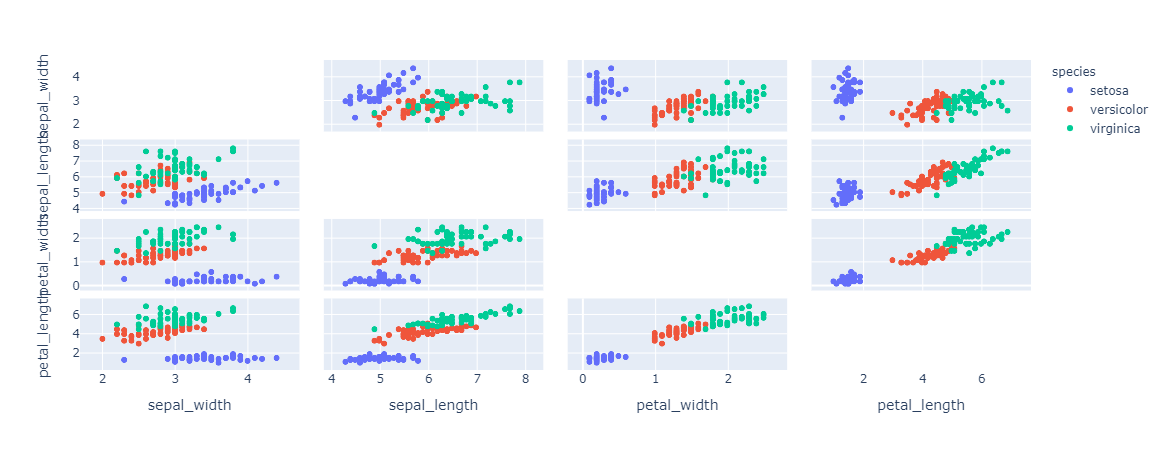

In [10]:
df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Visualize all the principal components

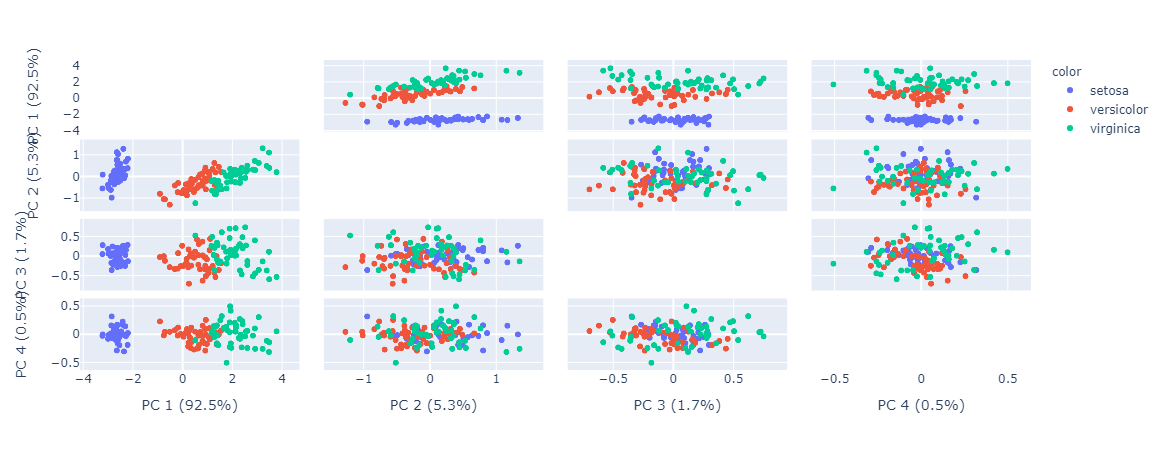

In [11]:
df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Visualize a subset of the principal components

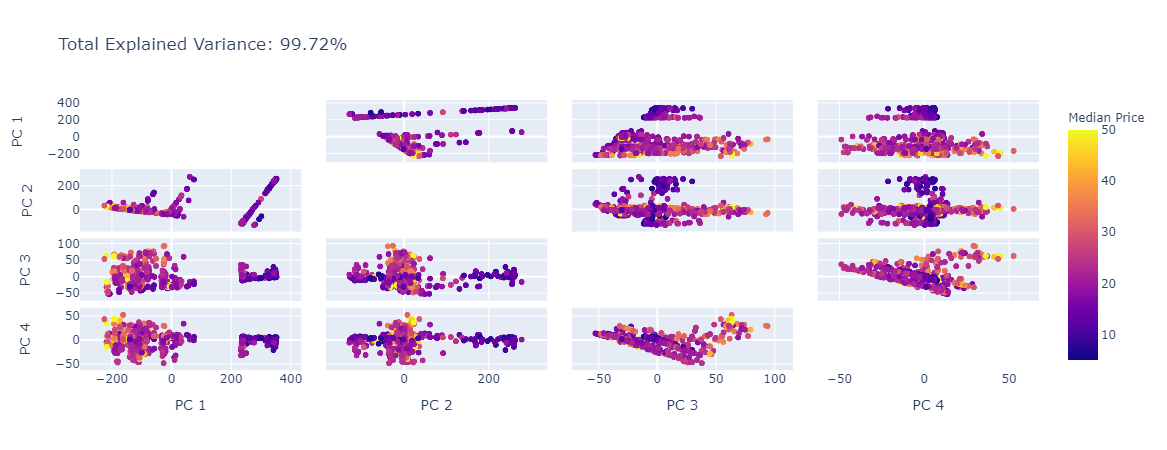

In [12]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

## PCA analysis in Dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(
    boston.data, columns=boston.feature_names)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=5, value=3,
        marks={i: str(i) for i in range(2,6)})
])

@app.callback(
    Output("graph", "figure"), 
    [Input("slider", "value")])
def run_and_plot(n_components):

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df)

    var = pca.explained_variance_ratio_.sum() * 100

    labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}
    labels['color'] = 'Median Price'

    fig = px.scatter_matrix(
        components,
        color=boston.target,
        dimensions=range(n_components),
        labels=labels,
        title=f'Total Explained Variance: {var:.2f}%')
    fig.update_traces(diagonal_visible=False)
    return fig

app.run_server(debug=True)

## 2D PCA Scatter Plot

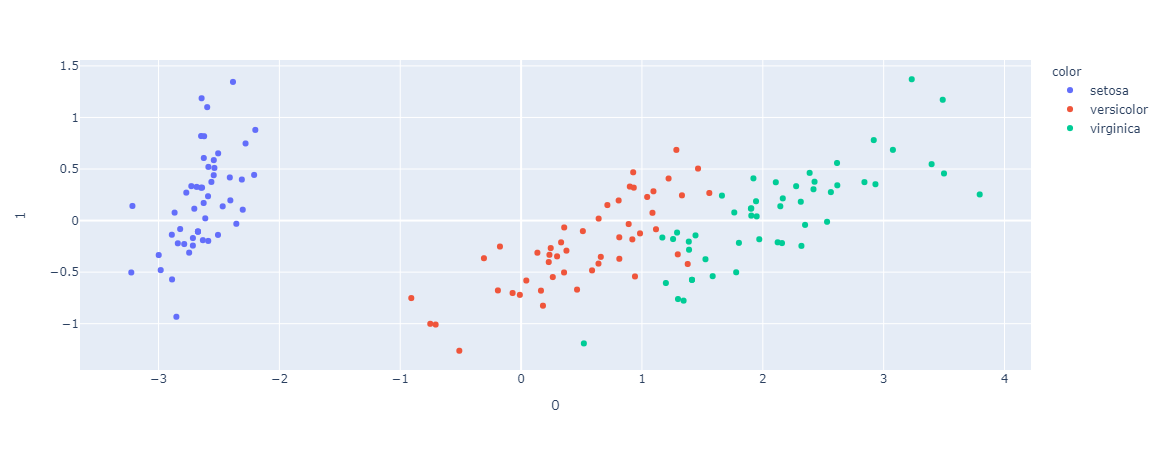

In [13]:
df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.show()

## Visualize PCA with px.scatter_3d

In [15]:
df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Plotting explained variance

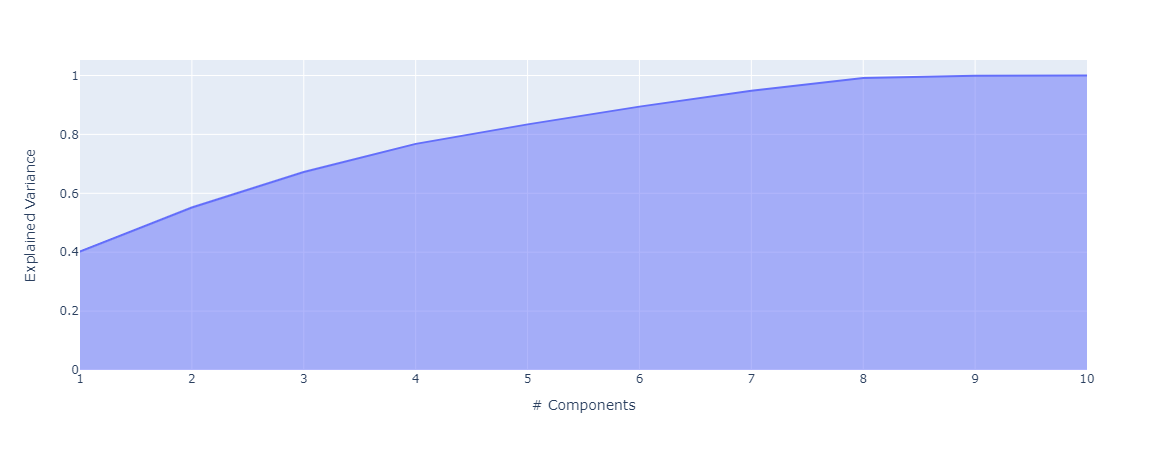

In [17]:
boston = load_diabetes()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)